<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных-к-анализу" data-toc-modified-id="Обзор-и-подготовка-данных-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных к анализу</a></span></li><li><span><a href="#Приоретизация-гипотез" data-toc-modified-id="Приоретизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоретизация гипотез</a></span></li><li><span><a href="#Анализ-A/B---теста" data-toc-modified-id="Анализ-A/B---теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B - теста</a></span><ul class="toc-item"><li><span><a href="#Проверка-групп" data-toc-modified-id="Проверка-групп-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка групп</a></span></li><li><span><a href="#Визуализация-кумулятивных-метрик" data-toc-modified-id="Визуализация-кумулятивных-метрик-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация кумулятивных метрик</a></span></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Анализ-А/В---теста" data-toc-modified-id="Анализ-А/В---теста-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ А/В - теста</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Приоретизация гипотез по увеличению выручки интернет-магазина. 

# Анализ А/В теста.

**Описание проекта**

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки крупного интернет-магазина. 

**Цель исследования**

Необходимо приоритезировать гипотезы, запустить А/В - тест и проанализировать результаты.

 **Ход исследования**
 
 1. Обзор и подготовка данных к анализу.
 2. Приоретизация гипотез
 3. Анализ А/В - теста
 4. Общий вывод.

## Обзор и подготовка данных к анализу

В этом разделе проведем обзор и подготовку данных к анализу:
1. Выгрузим и познакомимся с данными.
2. Найдем и устраним недочеты в данных.

Составим первое представление о данных. Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

Познакомимся с данными. Для этого создадим функцию, которая выводит общую информацию о данных, а также проверяет данные на пропуски и дубликаты:

In [3]:
def df_info(df, columns):
    print('Познакомимся с данными')
    display(df.head())
    print()
    print('Посмотрим сводную информация о данных')
    print()
    df.info()
    print()
    print("Проверим данные на пропуски и дубликаты")
    print()
    print("Доля пропусков:")
    display(df.isna().mean().round(2))
    print()
    print("Количество дубликатов:", df.duplicated().sum()) 
    print()
    print("Статистические данные:")
    display(df[columns].describe()) 

**Загрузим и познакомимся с данными о гипотезах** 

In [4]:
df_info(hypothesis, ['Reach', 'Impact', 'Confidence', 'Efforts'])

Познакомимся с данными


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Проверим данные на пропуски и дубликаты

Доля пропусков:


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


Количество дубликатов: 0

Статистические данные:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Посмотрим на весь список подготовленных гипотез:

In [5]:
display(hypothesis['Hypothesis'].unique())

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Итак, таблица содержит информацию о гипотезах. Всего 9 гипотез и 4 колонки со шкалой оценки влияния данных гипотез на пользователей, шкала тестирования каждой из них от 1 до 10. Пропусков, дубликатов и аномалий в данных не обнаружено.

Согласно документации к данным:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Загрузим и познакомимся с данными о покупках.** 

In [6]:
df_info(orders, 'revenue')

Познакомимся с данными


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Проверим данные на пропуски и дубликаты

Доля пропусков:


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


Количество дубликатов: 0

Статистические данные:


count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Итак, таблица содержит информацию о покупках. Всего 5 столбцах данные о 1197 транзакциях. Статистические данные о выручке показывают нам большой разброс, разберемся с этим позднее. Пропусков, дубликатов в данных не обнаружено.

Согласно документации к данным:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**Загрузим и познакомимся с данными о посещениях пользователями сайта коммпании.** 

In [7]:
df_info(visitors, 'visitors')

Познакомимся с данными


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Проверим данные на пропуски и дубликаты

Доля пропусков:


date        0.0
group       0.0
visitors    0.0
dtype: float64


Количество дубликатов: 0

Статистические данные:


count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Итак, таблица содержит информацию о визитах пользователей из разных групп. Всего таблица содержит 3 столбца и 62 строки. Пропусков, дубликатов в данных не обнаружено.

Согласно документации к данным:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Вывод**

Видны следующие недочеты во входных данных:

1. Нарушение стиля в названиях столбцов - строчные буквы сочетаются с прописными, поэтому приведем все названия к единому стилю.
2. Столбцы:
* `date`  в датасете orders, 
* `date` в датасете visitors

нуждается в корректировки формата даты и преобразовании в datetime.

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

Для начала приведем к "змеиному стилю" все названия столбцов. 

In [8]:
print("Первоначальные названия столбцов:", hypothesis.columns)
hypothesis.columns = hypothesis.columns.str.lower()
print("Названия столбцов после изменения:", hypothesis.columns)

Первоначальные названия столбцов: Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')
Названия столбцов после изменения: Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [9]:
print("Первоначальные названия столбцов:", orders.columns)
orders.columns = orders.columns.str.replace("I", "_i")
print("Названия столбцов после изменения:", orders.columns)

Первоначальные названия столбцов: Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
Названия столбцов после изменения: Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Преобразуем даты через функцию:

In [10]:
def datetime(df, column):
    df[column] = df[column].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
datetime(orders, 'date')
datetime(visitors, 'date')

Проверим корректность изменений:

In [12]:
print(orders['date'].dtypes)
print(visitors['date'].dtypes)

datetime64[ns]
datetime64[ns]


## Приоретизация гипотез

В этом разделе приоритизируем гипотезы:

1. Применим фреймворк ICE
2. Применим фреймворк RICE
3. Сделаем промежуточные выводы

Все данные, необходимые для расчета приоритета гипотез методом ICE и RICE есть в таблице `hypothesis`, проведем расчеты:

In [13]:
# приоретизируем гипотезы через ICE
hypothesis['ICE'] = (
    hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
).round(2)

pd.set_option('display.max_colwidth', 0)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [14]:
# приоретизируем гипотезы через RICE
hypothesis['RICE'] = (
    hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
).round(2)

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [15]:
# сводная таблица гипотез с сортировкой по убыванию RICE
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод**

Фреймворк `ICE` вывел в лидеры гипотезы: №8, 0, 7. В то время как RICE, учитывающий какое количество пользователей затронет изменение, которое мы хотим внести, в лидеры вывел гипотезы №7, 2, 0. Это произошло, так как показатель `reach` в гипотезе 7 имеет максимальные 10 баллов - полный охват пользователей. Поскольку для компании имеет важное значение какой части пользователей коснутся изменения, то приоритет расставим основываясь на расчетах фреймворка RICE.

## Анализ A/B - теста 

В этом разделе проведем анализ A/B - теста:

1. Проверим группы на дублирующихся пользователей, произведем анализ выборок.
2. Визуализируем:
    * кумулятивную выручку по группам;
    * кумулятивный средний чек по группам;
    * относительное изменение среднего чека группы В к группе А;
    * кумулятивную конверсию по группам;
    * относительное изменение кумулятивной конверсии группы В к группе А;
    
    
3. Проведем анализ выбросов и всплесков:
    * построим графики количества заказов по пользователям;
    * посчитаем 95, 99 перцентили количества заказов на пользователя;
    * построим точечный график стоимостей заказов;
    * посчитаем 95, 99 перцентили стоимости заказов;
    
    
4. Проведем анализ А/В - теста, посчитаем статистическую значимость различий:
    * в среднем количестве заказов на пользователя между группами по «сырым» данным; 
    * в среднем чеке заказа между группами по «сырым» данным; 
    * в среднем количестве заказов на пользователя между группами по «очищенным» данным; 
    * в среднем чеке заказа между группами по «очищенным» данным;
    * примем решение по результатам теста; 


5. Примем решение по результатам А/В - теста.

### Проверка групп

Убедимся в том, что не было "подглядования" пользователей и выборки с уникальными пользователями для каждой группы. 

**1. Проверим все ли пользователи уникальны для каждой группы.**

In [16]:
# создадим список пользователей, присутствующих в обеих группах
duplicated_visitors_id = (
    pd.Series(
        list(
            set(orders[orders['group'] == "A"]['visitor_id']) 
            & 
            set(orders[orders['group'] == "B"]['visitor_id'])
        )
    )
)

display(duplicated_visitors_id.head(10))
print('Итого уникальных дублирующихся пользователей:', duplicated_visitors_id.nunique())

0    3957174400
1    3984495233
2    2780786433
3    1294878855
4    1648269707
5    1614305549
6    4120364173
7    232979603 
8    199603092 
9    4266935830
dtype: int64

Итого уникальных дублирующихся пользователей: 58


In [17]:
# посмотрим на этот список
(
    orders[orders['visitor_id']
           .isin(duplicated_visitors_id)]
    .sort_values(by='visitor_id', 
                 ascending=False)
)

,transaction_id,visitor_id,date,revenue,group
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B
873,2519737434,4256040402,2019-08-08,58220,B
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
...,...,...,...,...,...
1102,1941707234,199603092,2019-08-12,6438,A
246,437656952,199603092,2019-08-02,3488,B
134,62794304,199603092,2019-08-22,6976,A
71,3679129301,8300375,2019-08-01,10510,B


In [18]:
print('Доля выручки повторяющихся пользователей: {:.2%}'.format(
    orders[orders['visitor_id']
           .isin(duplicated_visitors_id)]['revenue']
    .sum() 
    / 
    orders['revenue']
    .sum()
)
     )

Доля выручки повторяющихся пользователей: 15.60%


Итого у нас 181 строка с 58 уникальными пользователями, которые одновременно находятся сразу в двух группах, а это противоречит условию проведения А/В - теста. Поскольку в рамках проекта нет возможности уточнить причину, то можем предполажить, что это технический сбой сбора данных. Поэтому понять в какой именно группе те или иные пользователи принимали участие нет возможности, и, несмотря на большую долю выручки - 15.6% этих пользователей(скорее всего именно здесь кроются выбросы в данных), их необходимо удалить, чтобы не искажать результаты A/B- теста. 

In [19]:
print('Было пользователей:', len(orders))
orders = orders.query('visitor_id not in @duplicated_visitors_id')
print('Стало пользователей:', len(orders))

Было пользователей: 1197
Стало пользователей: 1016


**2. Анализ выборок.**

In [20]:
# разделим данные 
visitors_a = visitors.query('group == "A"')['visitors']
visitors_b = visitors.query('group == "B"')['visitors']

In [21]:
print("Количество пользователей в группе А:", visitors_a.sum())
print("Количество пользователей в группе B:", visitors_b.sum())
print("Общий размер выборки:", visitors['visitors'].sum())
print("Разница в количестве пользователей в двух группах:",'{0:.2f}'.format(visitors_a.sum() / visitors_b.sum()),'%')

Количество пользователей в группе А: 18736
Количество пользователей в группе B: 18916
Общий размер выборки: 37652
Разница в количестве пользователей в двух группах: 0.99 %


Проверили, что количество пользователей в группах различается не более, чем на 1%.

Для проверки данных о визитах пользователей в группах на нормальность распределения применим критерий Шапиро-Уилка.

**Сформулируем гипотезы:**

* Нулевая гипотеза: данные в группе распределены нормально.
* Альтернативная гипотеза: данные в группе распределены НЕ нормально.

In [22]:
alpha = .05 # критический уровень статистической значимости
results_a = st.shapiro(visitors_a)
results_b = st.shapiro(visitors_b)
p_value_a = results_a[1]
p_value_b = results_b[1] 

print('p_value группы А: ', "{:.3f}".format(p_value_a))
print('p_value группы B: ', "{:.3f}".format(p_value_b))

if p_value_a < alpha:
    print("Отвергаем нулевую гипотезу: данные в группе А распределены НЕ нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, данные в группе А распределены нормально")

if p_value_b < alpha:
    print("Отвергаем нулевую гипотезу: данные в группе B распределены НЕ нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, данные в группе B распределены нормально")

p_value группы А:  0.029
p_value группы B:  0.036
Отвергаем нулевую гипотезу: данные в группе А распределены НЕ нормально
Отвергаем нулевую гипотезу: данные в группе B распределены НЕ нормально


Поскольку мы выяснили, что данные в выборках распределены не нормально, то алгебраические метрики будут работать плохо. Поэтому проверим сказалось ли влияние изменений на количестве пользователей с помощью непараметрического теста Уилкоксона-Манна-Уитни:

**Сформулируем гипотезы:**

* Нулевая гипотеза: количество пользователей в группах не отличается.
* Альтернативная гипотеза: количество пользователей в группах отличается.

In [23]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(visitors_a, visitors_b)

print('p_value: ', "{:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в количестве пользователей в группах статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, разница в количестве пользователей в группах статистически НЕ значима') 

p_value:  0.730
Не получилось отвергнуть нулевую гипотезу, разница в количестве пользователей в группах статистически НЕ значима


**Вывод**

Благодаря проведенному предварительному анализу было выявлено существенное нарушение условия проведения А/В-теста - 58 пользователей одновременно находились сразу в двух группах. Возможно, это стало результатом технического сбоя сбора данных или человеческого фактора. Анализ выборок также показал, что разница в размерах выборок не превышает 1%, что укладывается в рамки нормы. Также удалось установить, что нет статистически значимой разницы в количестве пользователей в группах. Теперь можно переходить к визуализации и анализу метрик.

### Визуализация кумулятивных метрик

In [24]:
# посмотрим даты проведения теста
orders['date'].min(), orders['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Тест шел в течение месяца с 1 по 31 августа 2019г. Проанализируем графики кумулятивных метрик. 

**1. Построим график кумулятивной выручки по группам.**

Для начала соберем кумулятивные данные в единую таблицу `cumulative_data`.

In [25]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные данные о заказах по дням  
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                           orders['group'] == x['group'])]
                     .agg({'date' : 'max', 
                           'group' : 'max', 
                           'transaction_id' : 'nunique', 
                           'visitor_id' : 'nunique', 
                           'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date',
                     'group'])
)

# получаем агрегированные кумулятивные данные о посетителях интернет-магазина по дням 
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                             visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                                    'group' : 'max', 
                                                                                    'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date',
                     'group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график кумулятивной выручки по группам.

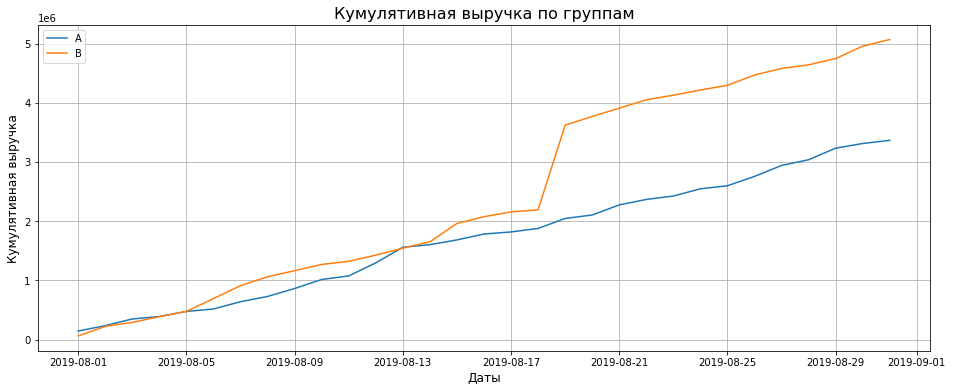

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(16, 6))
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивная выручка по группам', fontsize=16)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.legend()
plt.grid()
plt.show()

Посмотрим в какой именно момент произошел скачок выручки в группе В, отраженный на графике.

In [27]:
(
    cumulative_revenue_b
    .set_index('date')
    .loc['2019-08-15':'2019-08-21']
)

,revenue,orders
date,,
2019-08-15,1960427,289
2019-08-16,2074677,307
2019-08-17,2155542,320
2019-08-18,2190865,327
2019-08-19,3620785,348
2019-08-20,3768059,368
2019-08-21,3908406,380


**Вывод** 

Выручка в обеих группах постоянно увеличивается в течение всего теста. Это безусловно хороший знак. Но с 19 августа в группе В произошел резкий скачок выручки, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позже.

**2. Построим график кумулятивного среднего чека по группам.**

 Для этого разделим кумулятивную выручку на кумулятивное число заказов.

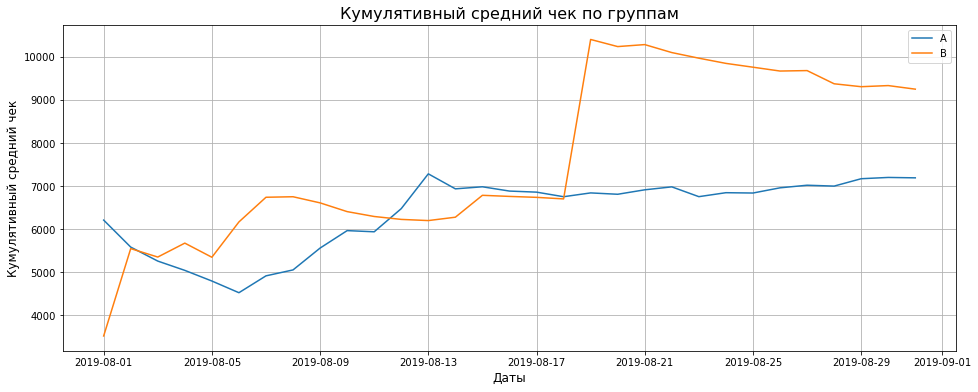

In [28]:
plt.figure(figsize=(16, 6))
# Строим график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# Строим график среднего чека группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам', fontsize=16)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.legend()
plt.grid()
plt.show()


**Вывод**  

Несмотря на все колебания в начале средний чек в обеих группах после 19 августа становится равномерным: установился на одном уровне с небольшим темпом роста для группы A и после бурного роста началось плавное падение для группы B. Поскольку предыдущий график показал нам рост кумулятивной выручки с 19 августа, а график среднего чека с этой же даты показал падение, то это, возможно, говорит о явном увеличении количества мелких заказов в это период, что в целом влияет на уровень падение кумулятивного среднего чека. 

Чтобы нагляднее увидеть разницу между группами

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

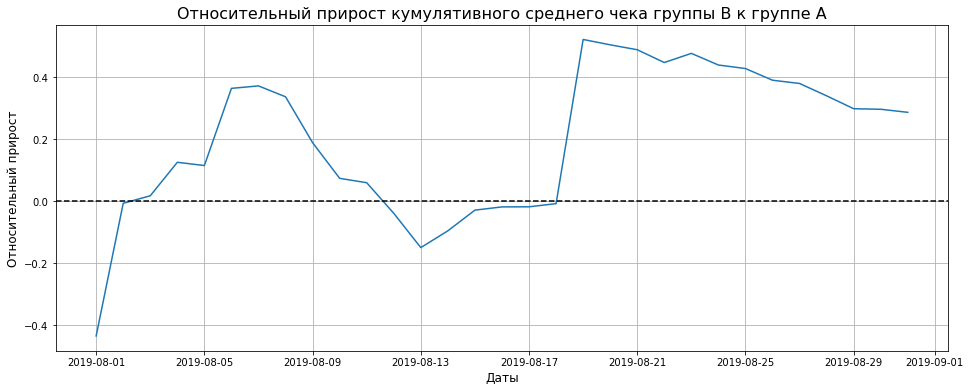

In [29]:
# собираем данные о кумулятивной выручке в двух группах в одном датафрейме
cumulative_revenue = (
    cumulative_revenue_a
    .merge(cumulative_revenue_b, 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['_a', '_b'])
)

# cтроим отношение средних чеков группы В к группе А
plt.figure(figsize=(16, 6))
(
    plt
    .plot(cumulative_revenue['date'], 
          (cumulative_revenue['revenue_b']/cumulative_revenue['orders_b'])/
          (cumulative_revenue['revenue_a']/cumulative_revenue['orders_a'])-1)
)
plt.title('Относительный прирост кумулятивного среднего чека группы В к группе А', fontsize=16)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Относительный прирост', fontsize=12)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.show()

**Вывод**

В нескольких точках график различия между сегментами резко «скачет». Именно в эти даты были совершены аномальные заказы в группе B. Найдём их позже. Тем не менее относительный прирост кумулятивного среднего чека группы В к группе А составляет 27.5%. 

**4. Построим график кумулятивной конверсии по группам**

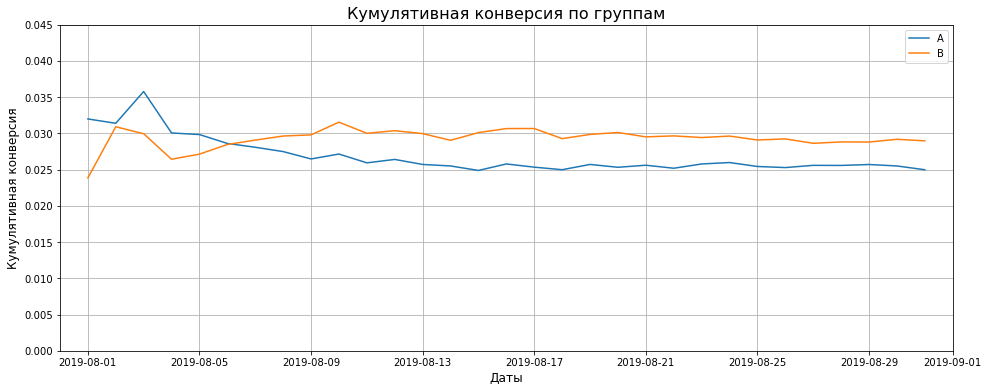

In [30]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(16, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам', fontsize=16)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Кумулятивная конверсия', fontsize=12)
plt.grid()

# задаем масштаб осей
plt.axis([dt.date(2019, 7, 31), dt.date(2019, 9, 1), 0, 0.045]) 
plt.show()

**Вывод** 

Обе группы колебались в первую неделю. В начале теста группа А имела более высокую конверсию, но затем конверсия группы В вырвалась вперёд и зафиксировалась на уровне 2.9%, а конверсия группы А просела и также зафиксировалась на уровне 2.5%. Тем не менее абсолютное значение колебания в начале и в конце теста не слишком большое - от 2.4 до 3.6%.

**5. Построим график относительного изменения кумулятивной конверсии группы В к группе А.**

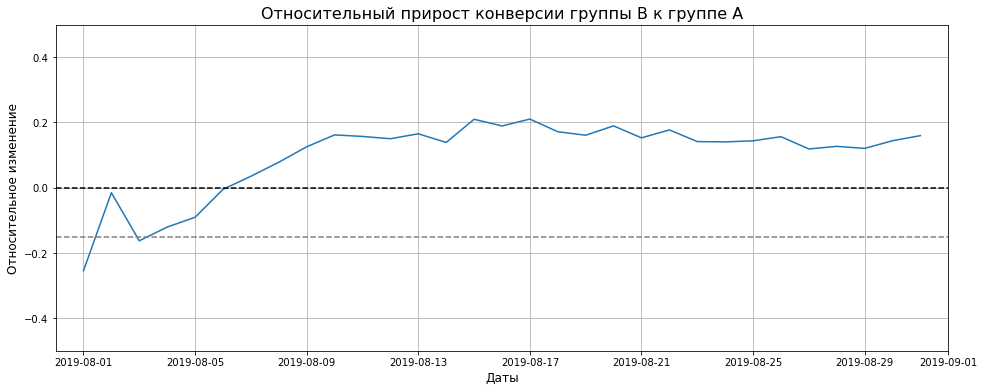

In [31]:
# собираем данные о кумулятивной конверсии в двух группах в одном датафрейме
cumulative_conversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['_a', '_b'])
)
# строим отношение кумулятивной конверсии группы В к группе А
plt.figure(figsize=(16, 6))
plt.plot(
    cumulative_conversions['date'], 
    cumulative_conversions['conversion_b']
    /
    cumulative_conversions['conversion_a']
    -1
) 
         
plt.title("Относительный прирост конверсии группы B к группе A", fontsize=16)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Относительное изменение', fontsize=12)
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.15, color='grey', linestyle='--')
# задаем масштаб осей
plt.axis([dt.date(2019, 7, 31), dt.date(2019, 9, 1), -0.5, 0.5]) 
plt.show()

**Вывод**

В начале теста группа B проигрывала группе A, затем вырвалась вперёд и постепенно росла, зафиксировавшись около прироста в 18% относительно группы А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Анализ выбросов и всплесков

Проанализируем аномалии, которые могут искажать результаты A/B-теста.

Помимо среднего чека, анализируют и конверсию. Поскольку пользователи, совершившие аномальное количество заказов, влияют на числитель формулы конверсии, то необходимо проверить именно этот параметр. Скорее всего, их поведение отличается от нормального.

Подсчитаем количество заказов на пользователя и посмотрим на результат:

**1. Построим графики количества заказов на пользователя.**

In [32]:
# сгруппируем заказы по пользователям и подсчитаем число уникальных заказов по сгруппированным данным
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)  
    .agg({'transaction_id': 'nunique'})            
)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


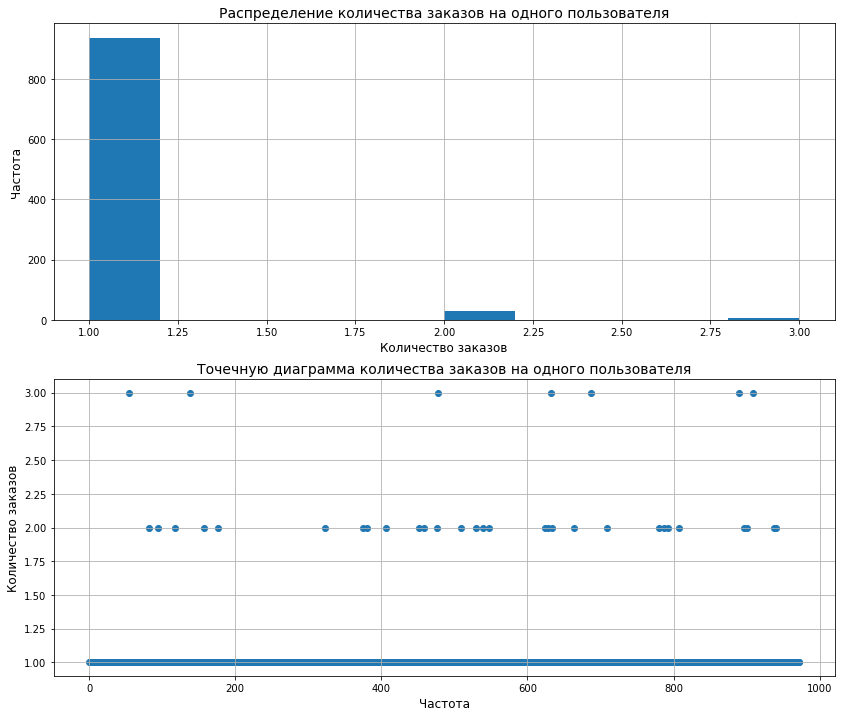

In [33]:
# строим гистограмму распределения числа заказов на одного пользователя
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.hist(orders_by_users['orders'])
plt.title('Распределение количества заказов на одного пользователя', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12) 
plt.ylabel('Частота', fontsize=12) 
plt.grid()

# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))
plt.subplot(2, 1, 2)
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Точечную диаграмма количества заказов на одного пользователя', fontsize=14)
plt.xlabel('Частота', fontsize=12) 
plt.ylabel('Количество заказов', fontsize=12) 
plt.grid()
plt.show()

Такая идеальная картина получилась в силу того, что мы изначально удалили всех дублирующихся в обеих группах пользователей. Если бы мы этого не сделали, график бы выглядел так:

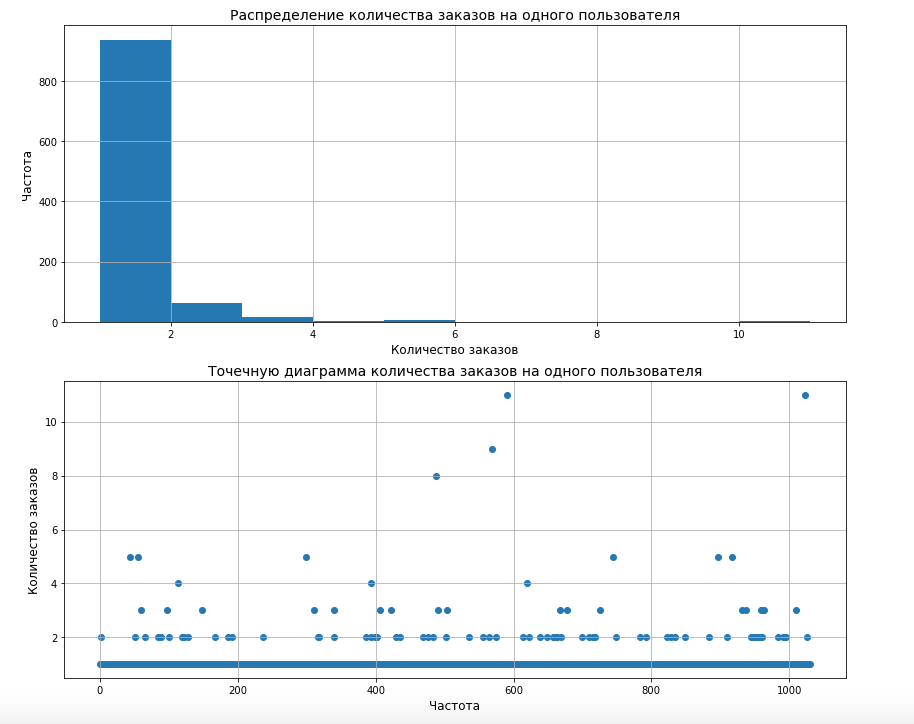

**Вывод**

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. После удаления дублирующихся пользователей, точечная диаграмма подтвердила выводы: есть много пользователей с 2-3 заказами. Однако их точная доля не ясна — непонятно, считать их аномалиями или нет. Для этого посчитаем 95-й и 99-й выборочные перцентили количества заказов по пользователям.

**2. Расчет 95 и 99 перцентиля количества заказов на пользователя.**

In [34]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

In [35]:
# какое количество пользователей сделало больше 2 заказов
orders_by_users[orders_by_users['orders'] > 2]['orders'].count()

7

**Вывод**

Не более 5% пользователей совершили больше 1 заказа и не более 1% пользователей совершили более 2 заказов. Если бы мы сразу не удалили аномальных пользователей, то показатели были бы иными: array([2., 4.]). В данном разделе аномальными можно считать пользователей, разместивших более 2 заказов. Поскольку дублирующиеся пользователи были основным источником аномалий в количестве заказов на пользователя, а именно этот параметр влияет на результаты конверсии, можно смело утверждать, что ранее расчитанные показатели конверсии можно считать достоверными и не подверженными влиянию аномалий.

**3. Построим графики стоимости заказов.**

Посмотрим нет ли аномалий среди стоимости заказов, поскольку это сразу же исказит результаты теста. 

In [36]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


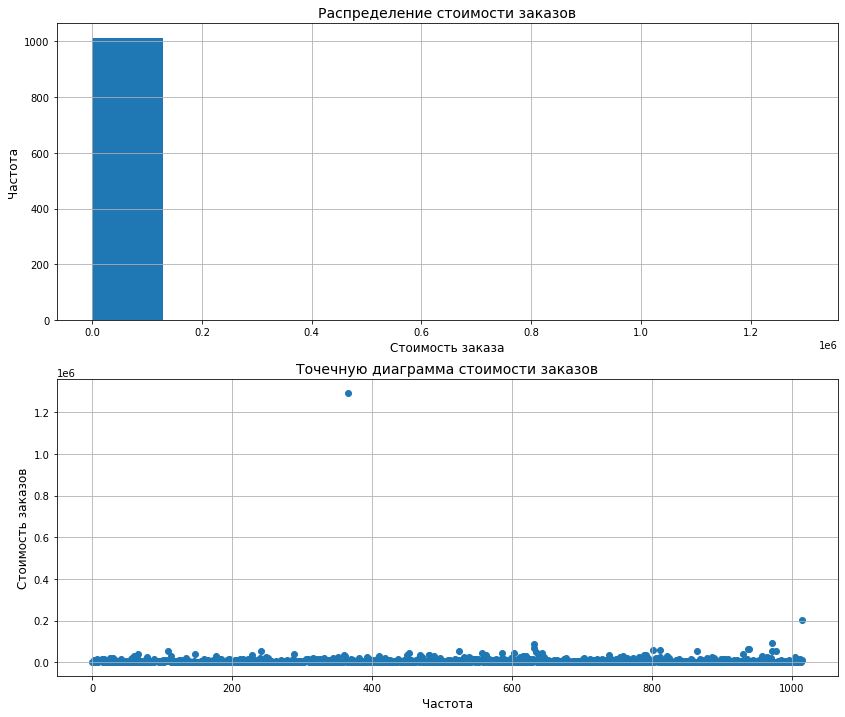

In [37]:
# строим гистограмму распределения стоимости заказов 
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.hist(orders['revenue'])
plt.title('Распределение стоимости заказов', fontsize=14)
plt.xlabel('Стоимость заказа', fontsize=12) 
plt.ylabel('Частота', fontsize=12) 
plt.grid()

# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders)))
plt.subplot(2, 1, 2)
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечную диаграмма стоимости заказов', fontsize=14)
plt.xlabel('Частота', fontsize=12) 
plt.ylabel('Стоимость заказов', fontsize=12) 
plt.grid()
plt.show()

Сильно дорогие заказы не дают возможности лучше рассмотреть распредление выручки. Посмотрим на распределение выручки без аномалий.

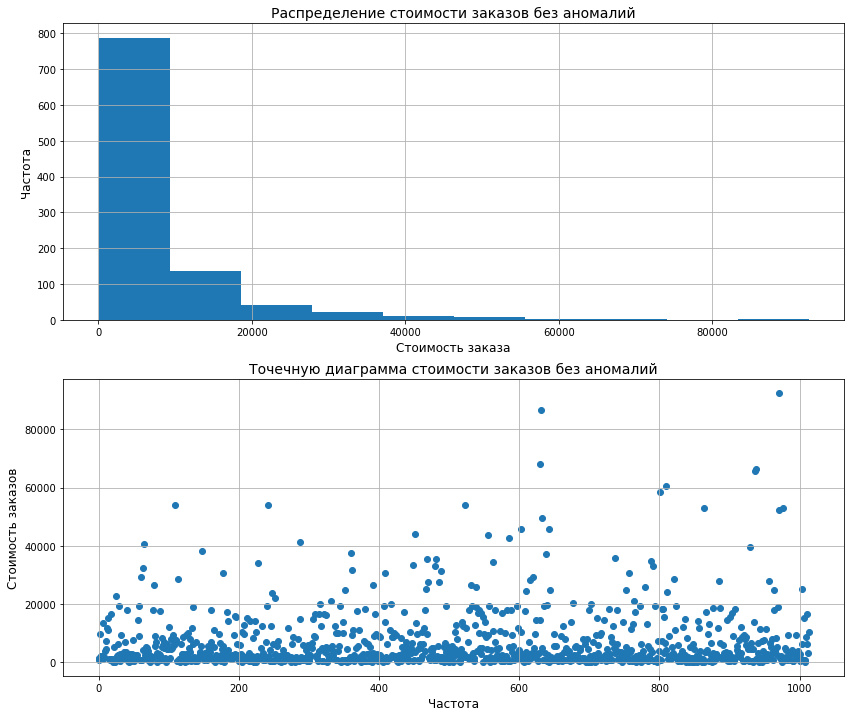

In [38]:
# строим гистограмму распределения стоимости заказов 
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.hist(orders[orders['revenue'] < 100000]['revenue'])
plt.title('Распределение стоимости заказов без аномалий', fontsize=14)
plt.xlabel('Стоимость заказа', fontsize=12) 
plt.ylabel('Частота', fontsize=12) 
plt.grid()

# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders[orders['revenue'] < 100000])))
plt.subplot(2, 1, 2)
plt.scatter(x_values, orders[orders['revenue'] < 100000]['revenue']) 
plt.title('Точечную диаграмма стоимости заказов без аномалий', fontsize=14)
plt.xlabel('Частота', fontsize=12) 
plt.ylabel('Стоимость заказов', fontsize=12) 
plt.grid()
plt.show()

**Вывод**

Графики показали, что в данных есть дорогие заказы. Для определения границы аномальных заказов (это могут быть как очень дорогие, так и чрезмерно дешевые заказы) посмотрим на 1% и 5% наблюдений с крайними значениями, для этого используем 1, 5, 95 или 99 перцентиль. 

4. Расчет 1, 5, 95 и 99 перцентиля стоимости заказов.

In [39]:
np.percentile(orders['revenue'], [1, 5, 95, 99])

array([  100.,   300., 26785., 53904.])

In [40]:
print("Количество заказов дешевле 100 руб.:", orders[orders['revenue'] < 100]['revenue'].count())
print("Количество заказов дороже 54 000 руб.:", orders[orders['revenue'] > 54000]['revenue'].count())

Количество заказов дешевле 100 руб.: 9
Количество заказов дороже 54 000 руб.: 9


**Вывод**

Удаленные ранее дублирующиеся пользователи значительно повлияли на количество заказов на пользователя, но практически не повлияли на графики стоимости и перцентили заказов. Таким образом мы выяснили, что не более 1% всех пользователей делает заказ дешевле 100 и дороже 53 904 рублей. Не более 5% пользователей делает заказ дешевле 300 и дороже 26 785 рублей. За границу аномалии возьмем все заказы ниже 1 и выше 99 перцентиля.

### Анализ А/В - теста

Выявленные аномалии дают основание для расчета статистической значимости различий метрик по 'сырым' и 'очищенным' данным. Это поможет принять более взвешенное решение о результатах теста.

**1. Расчет статистической значимости различий в количестве заказов на пользователя между группами в "сырых" данных**

Сначала соберем все необходимые для расчета данные в единой таблице `data` со следующими столбцами:
* `date` — дата;
* `orders_a_per_date` — количество заказов в выбранную дату в группе A;
* `revenue_a_per_date` — суммарная выручка в выбранную дату в группе A;
* `orders_b_per_date` — количество заказов в выбранную дату в группе B;
* `revenue_b_per_date` — суммарная выручка в выбранную дату в группе B;
* `orders_a_cummulative` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenue_a_cummulative` — суммарная выручка до выбранной даты включительно в группе A;
* `orders_b_cummulative` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenue_b_cummulative` — суммарная выручка до выбранной даты включительно в группе B;
* `visitors_a_per_date` — количество пользователей в выбранную дату в группе A;
* `visitors_b_per_date` — количество пользователей в выбранную дату в группе B;
* `visitors_a_cummulative` — количество пользователей до выбранной даты включительно в группе A;
* `visitors_b_cummulative` — количество пользователей до выбранной даты включительно в группе B.

In [41]:
# найдем ежедневное количество посетителей в каждой группе
daily_visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
daily_visitors_a.columns = ['date', 'visitors_a_per_date']

daily_visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
daily_visitors_b.columns = ['date', 'visitors_b_per_date']

# найдем кумулятивное количество пользователей в каждой группе
visitors_a_cummulative = (
    daily_visitors_a
    .apply(lambda x: daily_visitors_a[daily_visitors_a['date'] <= x['date']]
           .agg({'date': 'max', 'visitors_a_per_date': 'sum'}),axis=1)
)
visitors_a_cummulative.columns = ['date', 'visitors_a_cummulative']

visitors_b_cummulative = (
    daily_visitors_b
    .apply(lambda x: daily_visitors_b[daily_visitors_b['date'] <= x['date']]
           .agg({'date': 'max', 'visitors_b_per_date': 'sum'}),axis=1)
)
visitors_b_cummulative.columns = ['date', 'visitors_b_cummulative']

# найдем ежедневное количество покупателей и выручку в каждой группе
daily_orders_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
daily_orders_a.columns = ['date', 'orders_a_per_date', 'revenue_a_per_date']

daily_orders_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
daily_orders_b.columns = ['date', 'orders_b_per_date', 'revenue_b_per_date']

# найдем кумулятивное количество покупателей и кумулятивную выручку в каждой группе
orders_a_cummulative = (
    daily_orders_a
    .apply(lambda x: daily_orders_a[daily_orders_a['date'] <= x['date']]
           .agg({'date': 'max', 'orders_a_per_date': 'sum', 'revenue_a_per_date': 'sum'}),axis=1)
    .sort_values(by=['date'])
)
orders_a_cummulative.columns = ['date', 'orders_a_cummulative', 'revenue_a_cummulative']

orders_b_cummulative = (
    daily_orders_b
    .apply(lambda x: daily_orders_b[daily_orders_b['date'] <= x['date']]
           .agg({'date': 'max', 'orders_b_per_date': 'sum', 'revenue_b_per_date': 'sum'}),axis=1)
    .sort_values(by=['date'])
)
orders_b_cummulative.columns = ['date', 'orders_b_cummulative', 'revenue_b_cummulative']

# соберем все данные в единую таблицу
data = (
    daily_orders_a.merge(
        daily_orders_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_a, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cummulative,revenue_a_cummulative,orders_b_cummulative,revenue_b_cummulative,visitors_a_per_date,visitors_b_per_date,visitors_a_cummulative,visitors_b_cummulative
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные `orders_by_users_a` и `orders_by_users_b` с идентификатором пользователя и количеством совершенных этими пользователями заказов.

In [42]:
# создаем пары: идентификатор пользователя - количество покупок в каждой группе
orders_by_users_a = (
    orders[orders['group'] == "A"]
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'count_of_orders']

orders_by_users_b = (
    orders[orders['group'] == "B"]
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'count_of_orders']

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы корректно подготовить выборки к проверке критерием Манна-Уитни.

Переменная `sample_a` должна состоять из двух частей:

* Список с количеством заказов для каждого из пользователей: `orders_by_users_a['count_of_orders']`.
* Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitors_a_per_date'].sum() - len(orders_by_users_a['count_of_orders'])`. 

In [43]:
# соберем список всех заказов, начиная с нуля по всем пользователям по группам
sample_a = pd.concat(
    [
        orders_by_users_a['count_of_orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_a_per_date'].sum() - len(orders_by_users_a['count_of_orders'])), 
            name='count_of_orders'
                 )
    ]
    ,axis=0
)

sample_b = pd.concat(
    [
        orders_by_users_b['count_of_orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_b_per_date'].sum() - len(orders_by_users_b['count_of_orders'])), 
            name='count_of_orders'
                 )  
    ]
    ,axis=0
)

**Сформулируем гипотезы:**

* Нулевая: различий в количестве заказов на пользователя между группами нет. 
* Альтернативная: различия в количестве заказов на пользователя между группами есть.

Применим критерий Манна-Уитни поскольку в данных есть выбросы.

In [44]:
# получим p_value, применив критерий Манна-Уитни
p_value = st.mannwhitneyu(sample_a, sample_b)[1]

print('p_value =', "{0:.3f}".format(p_value))

# получим относительный прирост среднего числа заказов группы B к группе А
print("Относительный прирост среднего числа заказов группы B к группе А:", 
      "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1)
     )

alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: по «сырым» данным есть значимое различие в среднем числе заказов групп A и B')
else:
    print('По «сырым» данным различий в среднем числе заказов групп A и B нет.')

p_value = 0.011
Относительный прирост среднего числа заказов группы B к группе А: 0.160
Отвергаем нулевую гипотезу: по «сырым» данным есть значимое различие в среднем числе заказов групп A и B


**Вывод**

По "сырым" данным есть значимое различие в количестве заказов между группами. И относительный прирост cреднего числа заказов группы B к группе А составляет 16%.

**2. Расчет статистической значимости различий в среднем чеке между группами в "сырых" данных** 

**Сформулируем гипотезы:**

* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [45]:
# получим p_value в среднем чеке между группами
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                          orders[orders['group']=='B']['revenue'])[1]

print("p_value =", '{0:.3f}'.format(p_value))

print(
    'Относительный прирост среднего чека группы B к группе А:', 
    '{0:.3f}'.format(
        orders[orders['group']=='B']['revenue'].mean()
        /
        orders[orders['group']=='A']['revenue'].mean()
        -1
    )
) 

alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: по «сырым» данным есть значимое различие в среднем чеке групп A и B')
else:
    print('По «сырым» данным различий в среднем чеке групп A и B нет.')

p_value = 0.829
Относительный прирост среднего чека группы B к группе А: 0.287
По «сырым» данным различий в среднем чеке групп A и B нет.


In [46]:
print("Самые дорогие заказы в группе А:")
display(orders[(orders['group']=='A') & (orders['revenue'] > 90000)])
print("Самые дорогие заказы в группе B:")
display(orders[(orders['group']=='B') & (orders['revenue'] > 90000)])

Самые дорогие заказы в группе А:


,transaction_id,visitor_id,date,revenue,group
1136,666610489,1307669133,2019-08-13,92550,A


Самые дорогие заказы в группе B:


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


**Вывод** 

По «сырым» данным статистически значимых различий в среднем чеке групп A и B нет. Впрочем, относительный прирост среднего чека группы B значительно выше группы A - на 28.7%. Вот тут-то и проявили себя 2 аномально больших заказа в группе В, давших такой высокий уровень  относительного прироста. Посмотрим, как аномалии повлияли на результаты теста. Для этого посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке между группами теста по очищенным данным.

**3. Расчет статистической значимости в количестве заказов на пользователя между группами по "очищенным" данным**

Исходя из анализа возьмем за аномальных клиентов тех, кто совершил:

    * более 2 заказов,
    * заказы дешевле 100 рублей, 
    * заказы дороже 53904 рублей.
    
Для начала узнаем, сколько всего аномальных пользователей:

In [47]:
users_with_abnormal_orders = (
    orders_by_users[
        orders_by_users['orders'] > int(np.percentile(orders_by_users['orders'], [99]))
    ]['visitor_id']
)

users_with_abnormal_revenue = (
    orders[
        np.logical_or(
            orders['revenue'] > int(np.percentile(orders['revenue'], [99])), 
            orders['revenue'] < int(np.percentile(orders['revenue'], [1]))
        )]['visitor_id']
)

abnormal_users = (
    pd.concat(
        [
            users_with_abnormal_orders, 
            users_with_abnormal_revenue
        ], 
        axis=0)
    .drop_duplicates()
    .sort_values()
)
print("Аномальные пользователи")
display(abnormal_users.head())     
print('Итого аномальных пользователей:', abnormal_users.shape[0])

Аномальные пользователи


1099    148427295
55      249864742
138     611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64

Итого аномальных пользователей: 25


Всего 25 аномальных пользователей. Посмотрим, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами теста по очищенным данным. 

In [48]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['count_of_orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_a_per_date'].sum() - len(orders_by_users_a['count_of_orders'])), 
            name='count_of_orders'
                 )
    ]
    ,axis=0
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['count_of_orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_b_per_date'].sum() - len(orders_by_users_b['count_of_orders'])), 
            name='count_of_orders'
                 )  
    ]
    ,axis=0
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

**Сформулируем гипотезы:**

* Нулевая: различий в количестве заказов на пользователя между группами нет. 
* Альтернативная: различия в количестве заказов на пользователя между группами есть.

In [49]:
# получим p_value по "очищенным" данным, применив критерий Манна-Уитни
p_value = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

print("p_value = ", p_value.round(3))

# получим относительный прирост среднего числа заказов группы B к группе А по очищенным данных
print("Относительный прирост среднего числа заказов группы B к группе А:", 
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)
     )

alpha = 0.05

if p_value < alpha:
    print(
        'Отвергаем нулевую гипотезу: по «очищенным» данным есть значимое различие в среднем числе заказов на пользователя в группе А и В'
    )
else:
    print('По «очищенным» данным различий в среднем числе заказов на пользователя в группе A и B нет.')

p_value =  0.009
Относительный прирост среднего числа заказов группы B к группе А: 0.184
Отвергаем нулевую гипотезу: по «очищенным» данным есть значимое различие в среднем числе заказов на пользователя в группе А и В


**Вывод**

Как и в случае с "сырыми" данными достигнута статистическая значимость различий. Результаты по относительному приросту среднего количества заказов практически не изменились: вместо 16% теперь составляет 18.4%. В данной метрике группа В значительно лучше группы А. Посмотрим произошло ли что-нибудь с результатами по среднему чеку?

**4. Расчет статистической значимости в среднем чеке между группами по "очищенным" данным**

**Сформулируем гипотезы:**

* Нулевая гипотеза: по "очищенным" данным различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: по "очищенным" данным различия в среднем чеке между группами есть.

In [50]:
# получим p_value в среднем чеке между группами по "очищенным" данным
p_value = st.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormal_users))
        )
    ]['revenue'], 
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormal_users))
        )
    ]['revenue'])[1]


print("p_value =", "{0:.3f}".format(p_value))

print('Относительный прирост среднего чека группы B к группе А:', 
      "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: по «очищенным» данным есть значимое различие в среднем чеке групп A и B')
else:
    print('По «очищенным» данным различий в среднем чеке групп A и B нет.')

p_value = 0.881
Относительный прирост среднего чека группы B к группе А: -0.028
По «очищенным» данным различий в среднем чеке групп A и B нет.


**Вывод**

Хотя p_value незначительно увеличился, тем не менее аномально дорогие заказы в группе В в значительной степени повлияли на относительный прирост среднего чека, который при "очищенных" данных стал проигрышем среднего чека группы В к группе А на 2.8% вместо прироста в 28.7% в "сырых" данных.

**Выводы по результатам А/В - теста:**

Имеющиеся факты:

* Есть статистически значимое различие по среднему количеству заказов на пользователя между группами и по «сырым», и по "очищенным" данным в пользу группы В с существенным относительным приростом;

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

* График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A: зафиксировались около среднего значения.

1. Если для компании основной метрикой является конверсия, то, исходя из имеющихся фактов, тест следует остановить и признать его успешным с присуждением победы группе В. 

2. Если основная метрика компании - средний чек, то тест необходимо остановить и признать неуспешным, поскольку нет никаких предпосылок для получения статистически значимого различия этой метрики в группах.

## Вывод



В процесе анализа данных были проделаны следующие шаги:

1. Проведен обзор и предварительная подготовка дынных к анализу:
  - стили заголовков приведены к "змеиному стилю",
  - отформатированы данные с датами.
 
 
2. Проведена приоретизация гипотез фреймворком ICE и RICE.

3. Визуализированы основные кумулятивные метрики:
    * кумулятивная выручка по группам;
    * кумулятивный средний чек по группам;
    * относительное изменение среднего чека группы В к группе А;
    * кумулятивная конверсия по группам;
    * относительное изменение кумулятивной конверсии группы В к группе А;
    
    
4. Проведен анализ выбросов и всплесков:
    * построены графики количества заказов по пользователям;
    * посчитан 95, 99 перцентили количества заказов на пользователя;
    * построен точечный график стоимостей заказов;
    * посчитан 1, 5, 95, 99 перцентили стоимости заказов;
    
    
5. Проведен анализ А/В - теста, посчитана статистическая значимость различий:
    * в среднем количестве заказов на пользователя между группами по «сырым» данным; 
    * в среднем чеке заказа между группами по «сырым» данным; 
    * в среднем количестве заказов на пользователя между группами по «очищенным» данным; 
    * в среднем чеке заказа между группами по «очищенным» данным;
   

На основании проведенного анализа можно утверждать слудющее:

1. Фреймворк ICE вывел в лидеры гипотезу №8: 'Запустить акцию, дающую скидку на товар в день рождения', в то время как фреймворк RICE назначил лидером гипотезу №7: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
RICE, учитываюет какое количество пользователей затронет изменение, которое планируется внести, а гипотеза №7 имеет максимальные 10 баллов - полный охват пользователей. 

2. В результате проверки групп была выявлена проблема подглядывания - 58 уникальных пользователя, которые видели обе версии сайта, что противоречит принципу работы A/B-теста. Проблема была устранена удалением данных пользователей из групп. Установлено, что проведено корректное деление трафика - разница в размере выборок не превышает 1%, что укладывается в рамки нормы. Также доказано, что нет статистически значимой разницы в количестве пользователей в группах.

3. В процессе визуализации кумулятивных метрик выявлено, что:
    * кумулятивная выручка в обеих группах постоянно увеличивается в течение всего теста. Но с 19 августа в группе В произошел резкий скачок выручки за счет очень дорогих заказов в группе;
    * кумулятивный средний чек в обеих группах после 19 августа становится равномерным: установился на одном уровне с небольшим темпом роста для группы A и после бурного роста началось плавное падение для группы B;
    * относительный прирост кумулятивного среднего чека группы В к группе А составляет 27.5%;
    * кумулятивная конверсия группы В вырвалась вперёд и зафиксировалась на уровне 2.9%. Тем не менее абсолютное значение колебания в начале и в конце теста не слишком большое - от 2.4 до 3.6%;
    * относительный прирост кумулятивной конверсии зафиксировался около прироста в 18% относительно группы А.
    
4. Анализ выбросов и всплесков показал, что:
    * большинство покупателей сделали 1 заказ. Менее 5% пользователей совершили больше 1 заказа и менее 1% пользователей совершили более 2 заказов. За границу аномалии взяты все заказы выше 99 перцентиля.
    * менее 1% всех пользователей делает заказ дешевле 100 и дороже 53 904 рублей. Менее 5% пользователей делает заказ дешевле 300 и дороже 26 785 рублей. За границу аномалии взяты все заказы ниже 1 и выше 99 перцентиля.
    
5. Расчет статистической значимости различий в метриках по группам показал:
    * и по "сырым" и по "очищенным" данным ЕСТЬ статистически значимое различие в количестве заказов на пользователя между группами. И относительный прирост cреднего числа заказов на пользователя группы B к группе А составляет от 16% (сырае данных) до 18.4% (очищенные данные);
    * ни по «сырым», ни по "очищенным" данным НЕТ статистически значимых различий в среднем чеке групп A и B нет. Впрочем, относительный прирост среднего чека группы B значительно просел после очистки данных от аномалий - с прироста в 28.7% до проигрыша в  2.8% по сравнению с группой А. Такое сильное внияние оказала пара огромных заказов в группе В.
    
     **Выводы по результатам А/В - теста:**

1. Если для компании основной метрикой является конверсия, то, исходя из имеющихся фактов, тест следует остановить и признать его успешным с присуждением победы группе В. 

2. Если основная метрика компании - средний чек, то тест необходимо остановить и признать неуспешным, поскольку нет никаких предпосылок для получения статистически значимого различия этой метрики в группах.
    
    
**Рекомендации**

Выявить причину и решить проблему подглядывания.